# Análisando dados da produtividade da policia do estado de São Paulo em Santos

Segurança no Estado de São Paulo,
Dados estatísticos da Secretaria de Segurança Pública do Estado de São Paulo.
#### Organização
Governo de São Paulo
#### Cobertura temporal
2002 - 2021

In [112]:
#import bibliotecas
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [132]:
#importando o dataframe
df = pd.read_csv('br_sp_gov_ssp_produtividade_policial.csv')
df.head()

,ano,mes,id_municipio,regiao_ssp,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2002,1,3500105,Presidente Prudente,1.0,0.0,2.0,1.0,1.0,3.0,0.0,0.0,3.0,2.0,3.0,0.0,23.0
1,2002,2,3500105,Presidente Prudente,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,29.0
2,2002,3,3500105,Presidente Prudente,5.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,32.0
3,2002,4,3500105,Presidente Prudente,1.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,0.0,36.0
4,2002,5,3500105,Presidente Prudente,0.0,2.0,0.0,1.0,2.0,9.0,0.0,0.0,12.0,1.0,9.0,0.0,32.0


In [133]:
#Dadaos do dataframe
print(f'Esse dataframe contem {df.shape}, linhas e colunas')

print(f'\n Quantidade de itens nulos nas colunas \n {df.isna().sum()}')

Esse dataframe contem (150336, 17), linhas e colunas

 Quantidade de itens nulos nas colunas 
 ano                                                 0
mes                                                 0
id_municipio                                        0
regiao_ssp                                          0
ocorrencias_de_porte_de_entorpecentes            2580
ocorrencias_de_trafico_de_entorpecentes          2580
ocorrencias_de_apreensao_de_entorpecentes        2580
ocorrencias_de_porte_ilegal_de_arma              2580
numero_de_armas_de_fogo_apreendidas              2580
numero_de_flagrantes_lavrados                    2580
numero_de_infratores_apreendidos_em_flagrante    2580
numero_de_infratores_apreendidos_por_mandado     2580
numero_de_pessoas_presas_em_flagrante            2580
numero_de_pessoas_presas_por_mandado             2580
numero_de_prisoes_efetuadas                      2580
numero_de_veiculos_recuperados                   2580
total_de_inqueritos_policiais_instaurados

In [134]:
#removendo os nulos e tratando o dataframe
df.dropna()
df.inplace = True

#Dataframe sem os nulos
df.head()

,ano,mes,id_municipio,regiao_ssp,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2002,1,3500105,Presidente Prudente,1.0,0.0,2.0,1.0,1.0,3.0,0.0,0.0,3.0,2.0,3.0,0.0,23.0
1,2002,2,3500105,Presidente Prudente,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,29.0
2,2002,3,3500105,Presidente Prudente,5.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,32.0
3,2002,4,3500105,Presidente Prudente,1.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,0.0,36.0
4,2002,5,3500105,Presidente Prudente,0.0,2.0,0.0,1.0,2.0,9.0,0.0,0.0,12.0,1.0,9.0,0.0,32.0


In [135]:
#Selecionando os dados da cidade de Santos,somando os dados dos anos, e somando as colunas numericas


colunas_numericas = [
                   col for col in df.select_dtypes(include='number').columns
                    if col not in ['mes','id_municipio','ano']
                     ]

santos = df[df['regiao_ssp'] == 'Santos'].groupby('ano')[colunas_numericas].sum().reset_index()
santos

,ano,ocorrencias_de_porte_de_entorpecentes,ocorrencias_de_trafico_de_entorpecentes,ocorrencias_de_apreensao_de_entorpecentes,ocorrencias_de_porte_ilegal_de_arma,numero_de_armas_de_fogo_apreendidas,numero_de_flagrantes_lavrados,numero_de_infratores_apreendidos_em_flagrante,numero_de_infratores_apreendidos_por_mandado,numero_de_pessoas_presas_em_flagrante,numero_de_pessoas_presas_por_mandado,numero_de_prisoes_efetuadas,numero_de_veiculos_recuperados,total_de_inqueritos_policiais_instaurados
0,2002,2343.0,1077.0,228.0,977.0,1922.0,3576.0,914.0,141.0,4229.0,2010.0,5408.0,2358.0,17726.0
1,2003,2227.0,1214.0,146.0,923.0,2141.0,3922.0,1039.0,192.0,4894.0,2438.0,6030.0,3078.0,21277.0
2,2004,2047.0,1040.0,194.0,799.0,1788.0,4089.0,560.0,213.0,4988.0,2246.0,5964.0,2506.0,17544.0
3,2005,1885.0,992.0,187.0,618.0,1545.0,3888.0,482.0,297.0,4779.0,2598.0,6184.0,2785.0,16020.0
4,2006,2078.0,1278.0,313.0,567.0,1645.0,4180.0,567.0,154.0,5747.0,3124.0,6964.0,2985.0,15926.0
5,2007,2080.0,1522.0,296.0,471.0,1331.0,4317.0,614.0,261.0,5455.0,2569.0,6656.0,2550.0,16752.0
6,2008,1714.0,1617.0,342.0,344.0,1012.0,4105.0,527.0,176.0,5043.0,2563.0,6529.0,2595.0,15102.0
7,2009,1474.0,1718.0,292.0,365.0,1270.0,4753.0,920.0,277.0,6031.0,2887.0,7479.0,3296.0,16977.0
8,2010,1203.0,1643.0,263.0,330.0,1057.0,4360.0,676.0,287.0,5431.0,2445.0,6765.0,3233.0,16163.0
9,2011,1670.0,1951.0,250.0,334.0,1071.0,4862.0,763.0,290.0,5866.0,2602.0,7347.0,3069.0,17965.0


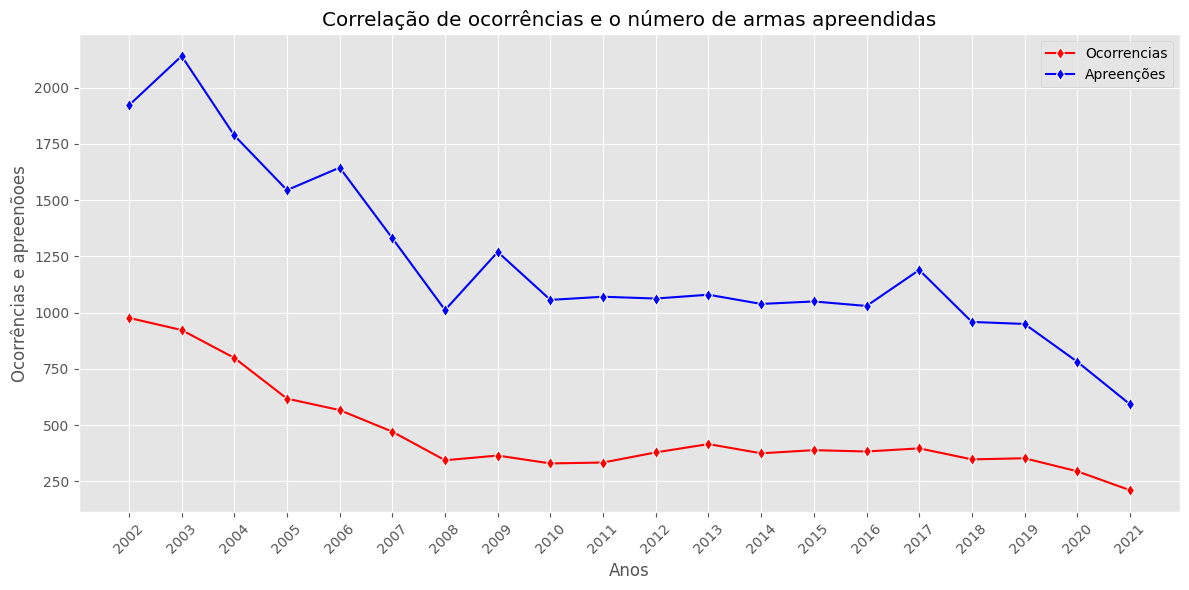

In [136]:
#histrograma sobre ocorrencias de porte ilegal de arma
plt.figure(figsize= (12,6))
sns.lineplot(x='ano', y='ocorrencias_de_porte_ilegal_de_arma', data= santos, label='Ocorrencias', color= 'red', marker= 'd')
sns.lineplot(x='ano', y='numero_de_armas_de_fogo_apreendidas', data= santos, label= 'Apreenções', color= 'blue', marker= 'd') 
plt.title('Correlação de ocorrências e o número de armas apreendidas')
plt.xlabel('Anos')
plt.ylabel('Ocorrências e apreenõoes')
plt.legend()
plt.xticks(santos['ano'], rotation =45)
plt.grid(True)
plt.tight_layout()

É notável que o número de apreenções é superior ao de denúncias mas também é fato que eum uma ocorrência pode se apreender várias armas.

A uma queda notável de ocorrencias, isso é um dado interessante.

#### Iremos analisar os numeros de inqueritos por ano agora

Sem representação graficas é possivel ver que os números são bem altos já, porém como quase todos os outros índices ele vem caindo drasticamente, iremos fazer um grafico de disperção para notar essa queda e ver quando ela "começa"

In [137]:
#Criando o grafico com go.scatter
scatter = go.Bar(x = santos.ano, y =santos.total_de_inqueritos_policiais_instaurados,
                     marker ={'color': "#AC0000"}, opacity = 0.5, hovertemplate='Nº de Inqueritos: %{y}<extra></extra>') 

#configurando o layout
layout = go.Layout(title = 'INQUERITOS POR ANO',
                   xaxis ={'title': 'Anos'},
                   yaxis ={'title': 'Número de inqueritos'})

fig = go.Figure(data=[scatter], layout= layout)
fig.show()